# Breaks down all the Table in .xlsx into multiplpe CSV

In [ ]:
import pandas as pd


FILENAME = "datasets/ISE_CoffeeTransaction_April2023.xlsx"
# Load the Excel file
xls = pd.ExcelFile(FILENAME)

# Get the names of all sheets in the Excel file
sheet_names = xls.sheet_names

# Loop through the sheet names
for sheet in sheet_names:
    # Read the data from the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name=sheet)
    
    # Write the DataFrame to a csv file, using the sheet name as the file name
    df.to_csv(f'datasets_csv/{sheet}.csv', index=False)


In [8]:
import pandas as pd

# Load the csv files into DataFrames
df_transactions = pd.read_csv('datasets_csv/Transactions.csv')
df_accounts = pd.read_csv('datasets_csv/Account.csv')
df_products = pd.read_csv('datasets_csv/Product.csv')

# Merge df_transactions and df_accounts on 'Account_id'
df = pd.merge(df_transactions, df_accounts[['Account_id', 'Age']], on='Account_id', how='left')

# Merge the result with df_products on 'product_id'
df = pd.merge(df, df_products[['product_id', 'product_name']], on='product_id', how='left')

# Save the result to a new csv file
df.to_csv('Merged.csv', index=False)


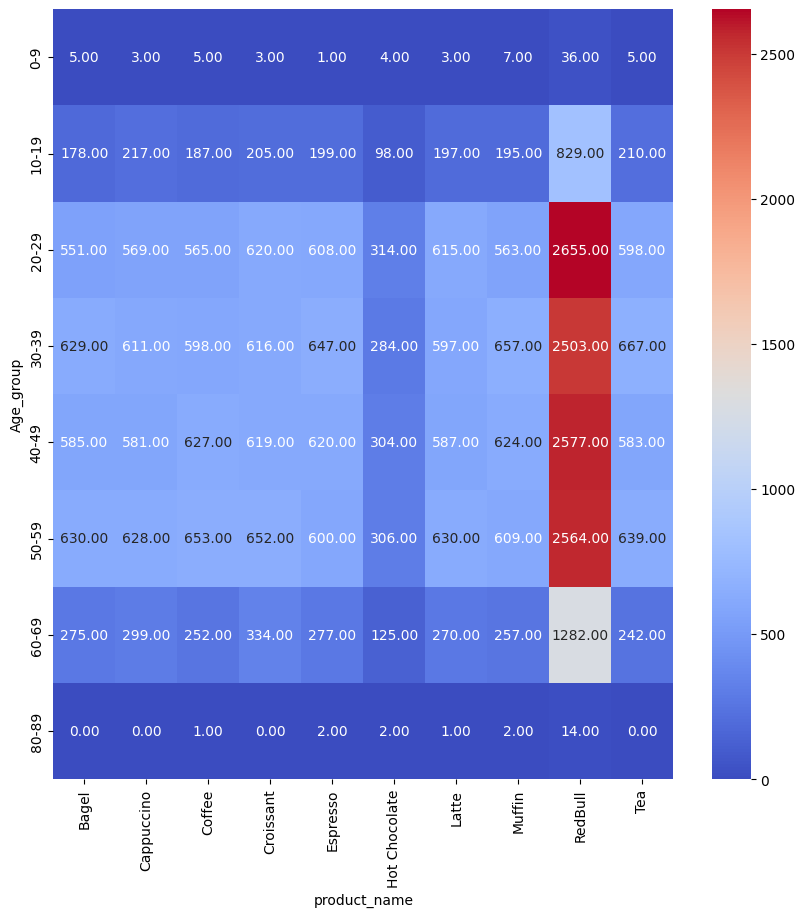

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'Age' and 'product_name'

# Create age groups at 10 year intervals
bins = range(0, int(df['Age'].max()) + 10, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Create a cross-tabulation (frequency table)
cross_tab = pd.crosstab(df['Age_group'], df['product_name'])
# Convert to integer
cross_tab = cross_tab.astype(int)

# Now we use this cross-tabulation to calculate Cramer's V, which is a measure of association between two nominal variables
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for Age_group and product_name
cramers_v(cross_tab)
# print(cross_tab)




# Assuming that 'corr_matrix' is your correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
